In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [4]:
df = pd.read_csv('breast_cancer_wisconsin_data')
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)
full_data = df.astype(float).values.tolist()

In [8]:
full_data

[[3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 7.0, 1.0, 1.0, 2.0],
 [10.0, 4.0, 3.0, 2.0, 3.0, 10.0, 5.0, 3.0, 2.0, 4.0],
 [1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [9.0, 1.0, 2.0, 6.0, 4.0, 10.0, 7.0, 7.0, 2.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 10.0, 10.0, 10.0, 3.0, 10.0, 10.0, 6.0, 1.0, 4.0],
 [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 4.0, 4.0, 1.0, 2.0, 9.0, 3.0, 3.0, 1.0, 4.0],
 [6.0, 2.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 2.0],
 [8.0, 3.0, 8.0, 3.0, 4.0, 9.0, 8.0, 9.0, 8.0, 4.0],
 [4.0, 1.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [10.0, 10.0, 10.0, 8.0, 2.0, 10.0, 4.0, 1.0, 1.0, 4.0],
 [5.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1

In [9]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}     #2 & 4 is output data
test_set = {2:[], 4:[]}      #2 is for benign tumors &  4 is for maligant tumors
train_data = full_data[: -int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [7]:
train_data

[[3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 7.0, 1.0, 1.0, 2.0],
 [10.0, 4.0, 3.0, 2.0, 3.0, 10.0, 5.0, 3.0, 2.0, 4.0],
 [1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [9.0, 1.0, 2.0, 6.0, 4.0, 10.0, 7.0, 7.0, 2.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 10.0, 10.0, 10.0, 3.0, 10.0, 10.0, 6.0, 1.0, 4.0],
 [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 4.0, 4.0, 1.0, 2.0, 9.0, 3.0, 3.0, 1.0, 4.0],
 [6.0, 2.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 2.0],
 [8.0, 3.0, 8.0, 3.0, 4.0, 9.0, 8.0, 9.0, 8.0, 4.0],
 [4.0, 1.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [10.0, 10.0, 10.0, 8.0, 2.0, 10.0, 4.0, 1.0, 1.0, 4.0],
 [5.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1

In [10]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])  # checkingi[-1] for key 2, or
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [11]:
def K_nearest_neighbours(data, predict, k=6):

    if len(data) >= k:
        print('k is set to a value less than total voting groups')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
 
    vote_result = Counter(votes).most_common(2)[0][0]
    return vote_result


In [12]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:  
        vote = K_nearest_neighbours(train_set, data, k=6)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9640287769784173


<function matplotlib.pyplot.show>

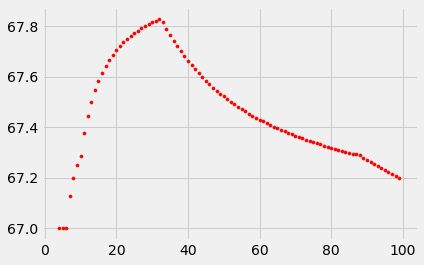

In [13]:
correct=0
total=0
for k in range(4,100):
    for group in test_set:
        for data in test_set[group]:
            vote = K_nearest_neighbours(train_set, data, k)
            if group == vote:
                correct += 1
        total +=1
    plt.scatter(k,(correct/total),s=10,color='r')
plt.show 